In [1]:
%matplotlib inline
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import numpy as np
import imageio
from PIL import Image
plt.rcParams['image.cmap'] = 'RdBu_r'


In [2]:
def svd(A):
    # Compute the eigenvectors and eigenvalues of A.T @ A
    w, V = LA.eig(np.nan_to_num(A.T @ A))  
    # Calculate sigma values (singular values)
    sigma = np.sqrt(np.abs(w))
    # Create the diagonal matrix D using singular values
    D = np.diag(sigma) 
    # Calculate the U matrix
    U = np.zeros(A.shape)
    for i in range(len(sigma)):
        if sigma[i] != 0:
            U[:, i] = (1 / sigma[i]) * A @ V[:, i]
        else:
            U[:, i] = 0
    return U, D, V.T

# Example usage:
A = np.array([[1, 0],
              [1, 0],
              [0, 1]])
U, D, Vt =svd(A)
print("SVD:")
print("U:", U)
print("D:", D)
print("Vt:", Vt)

SVD:
U: [[0.70710678 0.        ]
 [0.70710678 0.        ]
 [0.         1.        ]]
D: [[1.41421356 0.        ]
 [0.         1.        ]]
Vt: [[1. 0.]
 [0. 1.]]


In [3]:
LA.norm(U@D@Vt-A)

0.0

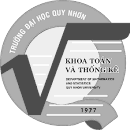

In [5]:
image = Image.open("images.png")

# Convert the image to grayscale
gray_image = image.convert("L")

# Convert the image to a NumPy array
image_array = np.array(gray_image, dtype=np.float64)
display(gray_image)

In [39]:
U, D, Vt = svd(image_array)

In [6]:
LA.norm(U@ D@ Vt - image_array)

8.380218993166975e-08

Text(0.5, 1.0, 'Singular Values, $S_k$')

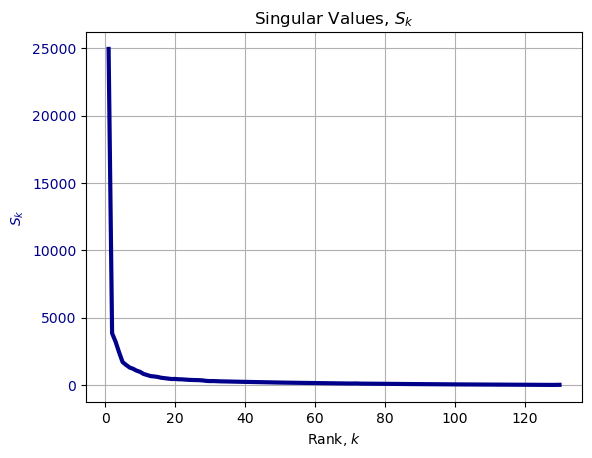

In [26]:
### Raw singular values
plt.plot(component_idx, S, label='Singular Values of $$X$$', color='darkblue', linewidth=3)
plt.grid()
plt.xlabel("Rank, $k$")
plt.ylabel('$S_k$', color='darkblue')
plt.tick_params(axis='y', labelcolor='darkblue')
plt.title('Singular Values, $S_k$')


In [27]:
rank_info_retained

0.9996291974891308

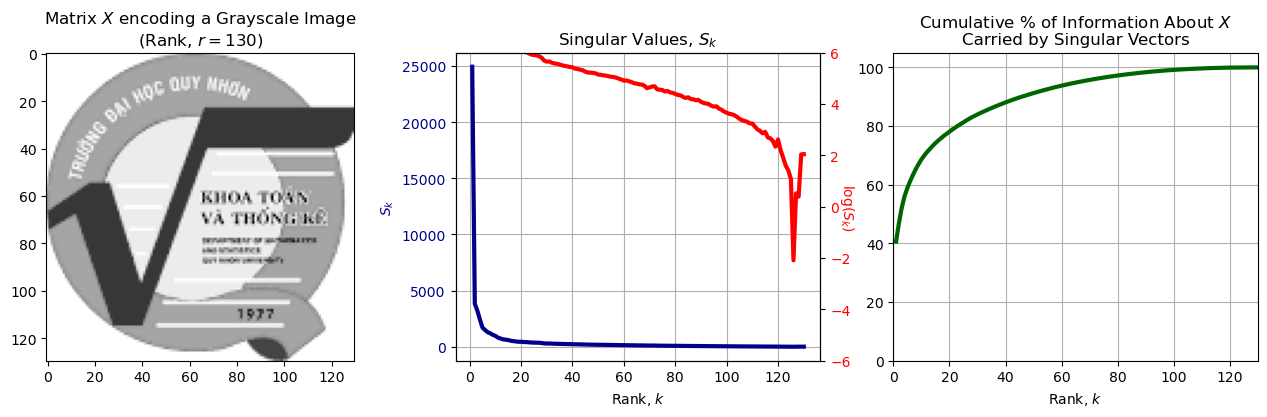

In [42]:
img_rank = np.linalg.matrix_rank(image_array, 0.)
S = np.diag(D)

# Calculate the cumulative variance explained by each singular value
total_S = S.sum()
n_components = len(S)
component_idx = range(1,  n_components + 1)
info_retained = 100 * np.cumsum(S) / total_S

# Visualizations
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

## Raw Image, X
plt.sca(axs[0])
plt.imshow(image_array, cmap='gray')
plt.title(f"Matrix $X$ encoding a Grayscale Image\n(Rank, $r=${img_rank})")

## Singular values as function of rank
plt.sca(axs[1])

### Raw singular values
plt.plot(component_idx, S, label='Singular Values of $$X$$', color='darkblue', linewidth=3)
plt.grid()
plt.xlabel("Rank, $k$")
plt.ylabel('$S_k$', color='darkblue')
plt.tick_params(axis='y', labelcolor='darkblue')
plt.title('Singular Values, $S_k$')

### log(singular values)
twax = plt.gca().twinx()  # twin axes that shares the same x-axis
twax.plot(component_idx, np.log(S), color='red', linewidth=3)
plt.ylabel('$\log(S_k)$\n', color='red', rotation=270)
plt.tick_params(axis='y', labelcolor='red')
plt.ylim([-6, 6])

## Information retained as function of rank
plt.sca(axs[2])
plt.plot(component_idx, info_retained, color='darkgreen', linewidth=3)
plt.xlim(0, n_components)
plt.ylim([0, 105])
plt.xlabel("Rank, $k$")
plt.grid()
plt.title('Cumulative % of Information About $X$\nCarried by Singular Vectors')

plt.savefig('image-singular-values.png', bbox_inches='tight', dpi=300)

In [44]:
info_retained

array([ 40.62263176,  46.86827785,  52.09157541,  56.0334266 ,
        58.80236257,  61.21963813,  63.33014305,  65.28155012,
        67.00744725,  68.58847969,  69.91654271,  71.11631096,
        72.18302325,  73.21010718,  74.17805149,  75.0477979 ,
        75.86617675,  76.64562106,  77.35968846,  78.08224365,
        78.76817724,  79.44085364,  80.08121899,  80.69308689,
        81.2943769 ,  81.88891148,  82.46255449,  83.00441034,
        83.48771171,  83.95182449,  84.41944661,  84.86417214,
        85.29627245,  85.72340589,  86.13957584,  86.54187413,
        86.93410262,  87.32038178,  87.69745411,  88.07078456,
        88.42444119,  88.77320899,  89.11229864,  89.4442762 ,
        89.75807826,  90.06246818,  90.36452615,  90.66440939,
        90.95844541,  91.23913629,  91.51718315,  91.78907532,
        92.058478  ,  92.32124572,  92.57877398,  92.83338527,
        93.08209899,  93.32131125,  93.55324621,  93.77451496,
        93.9974282 ,  94.21381891,  94.42306131,  94.62

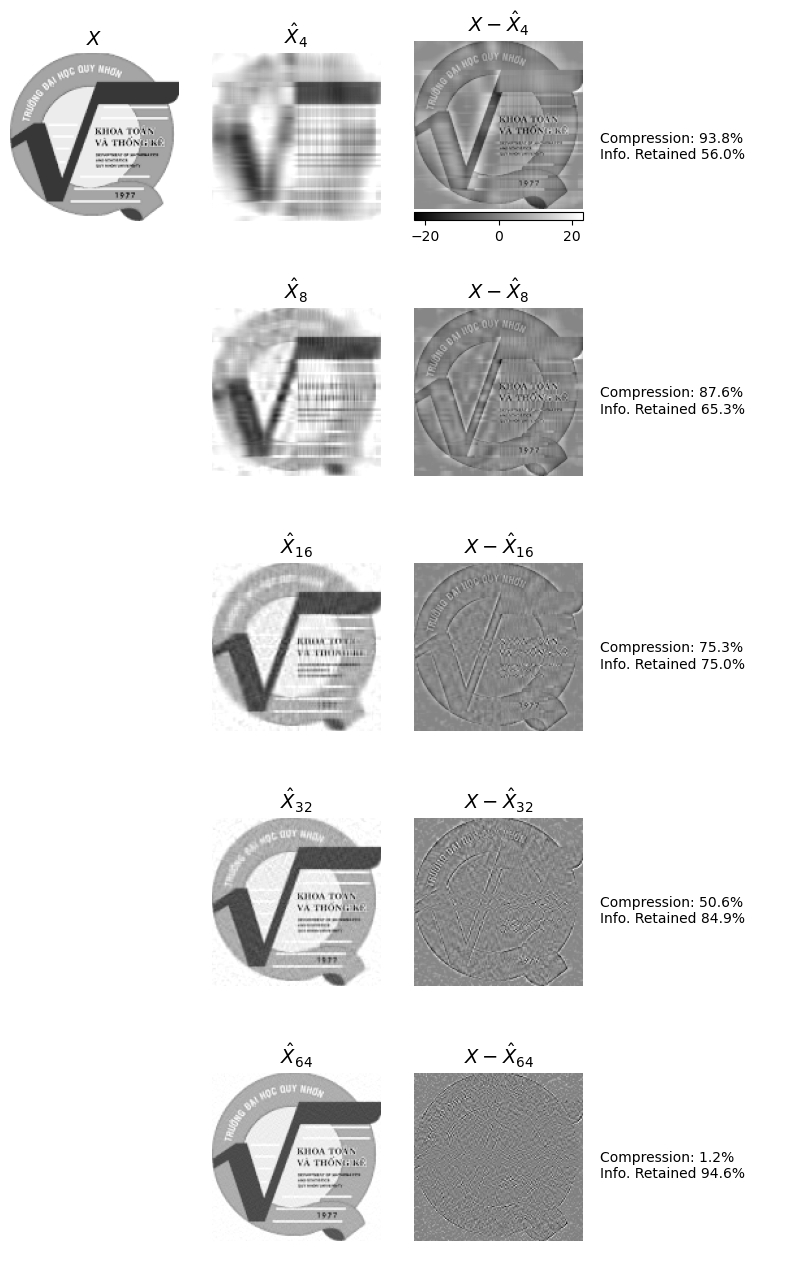

In [46]:
X = image_array
# S = np.diag(D)

# # Calculate explained variance ratio
# info_retained = np.cumsum(S**2) / np.sum(S**2)

# Image Reconstruction
N = 5
fig, axs = plt.subplots(N, 4, figsize=(10, 16))
plt.sca(axs[0][0])
plt.imshow(image_array, cmap='gray')
# plt.clim([0, 255])
plt.axis('off')
plt.title("$X$", fontsize=14)

# Reconstruct image with increasing number of singular vectors/values
for power in range(1, N + 1):
    rank = 2 ** (1 + power)

    # Compressed/Reconstructed Image
    X_reconstruction = U[:, :rank] @ D[:rank, :rank] @ Vt[:rank, :]

    # Calculate number of floats required to store compressed image
    rank_data_compression = 100 * (1. - (1. * U[:, :rank].size + S[:rank].size + Vt[:rank, :].size) / image_array.size)

    # Variance of original image explained by n components
    rank_info_retained = info_retained[rank-1]

    # Visualizations
    ## Original Image
    if power > 1:
        plt.sca(axs[power-1][0])
        plt.cla()
        plt.axis('off')

    ## Image reconstruction
    plt.sca(axs[power-1][1])
    X_reconstruction = np.clip(X_reconstruction, 0, 255).astype(np.uint8)
    plt.imshow(X_reconstruction, cmap='gray')
    plt.clim([0, 255])
    plt.axis('off')
    plt.title(f'$\hat{{X}}_{{{rank}}}$',fontsize=14)

    ## Reconstruction error
    plt.sca(axs[power-1][2])
    cax = plt.imshow(X - X_reconstruction,cmap='gray')
    plt.axis('off')
    plt.title(f'$X -\hat{{X}}_{{{rank}}}$',fontsize=14)


    ## Compression/reconstruction info
    plt.sca(axs[power-1][3])
    compression_text = f'Compression: {rank_data_compression:1.1f}%\nInfo. Retained {rank_info_retained:1.1f}%'
    plt.text(-.1, .4, compression_text)
    plt.axis('off')
    
fig.colorbar(cax, ax=axs[0][2], pad=.01, orientation='horizontal')
plt.savefig('svd_qnu.png', bbox_inches='tight', dpi=300)

In [9]:
X_centered =  image_array - np.mean(image_array, axis=0)

In [10]:
X_centered = np.array(X_centered, dtype=np.float64)

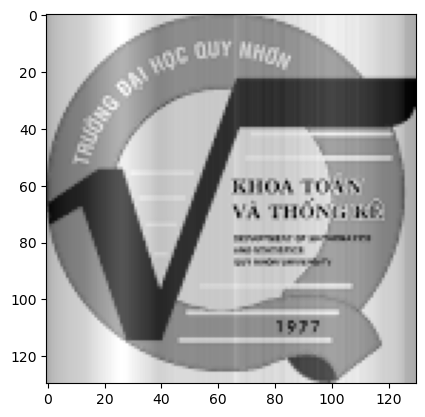

In [11]:
plt.imshow(X_centered,cmap='gray')

In [12]:
U, D, Vt = svd(X_centered)

In [ ]:
LA.norm(A@Bt-X_centered)

In [15]:
k=100

In [ ]:
A_k =m**(1/2)*U[:,:k]
Bt_k =m**(-1/2)*D[:k,:k]@Vt[:k,:]

In [16]:

def pca(X, k):
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Perform SVD on the centered data
    U, D, Vt = svd(X_centered)
    
    # Compute the transformed matrices
    m = X_centered.shape[0]
    A = U
    Bt = D@Vt

    # Reduce the dimensionality to k dimensions
    A_k = U[:,:k]
    Bt_k = D[:k,:k]@Vt[:k,:]

    return A_k, Bt_k


In [6]:
A_k, Bt_k = pca(image_array,100)

In [7]:
A_k, Bt_k = pca(A,2)

In [15]:
 np.mean(A, axis=0)

array([0.66666667, 0.33333333])

In [13]:
A_centered = A - np.mean(A, axis=0)

In [14]:
A_centered

array([[ 0.33333333, -0.33333333],
       [ 0.33333333, -0.33333333],
       [-0.66666667,  0.66666667]])

In [17]:
U, D, Vt = svd(A_centered)

In [18]:
U

array([[ 0.        ,  0.40824829],
       [ 0.        ,  0.40824829],
       [ 0.        , -0.81649658]])

In [9]:
Bt_k

array([[ 0.        ,  0.        ],
       [ 0.47140452, -0.47140452]])

In [12]:
A_k@Bt_k +np.mean(A, axis=0)

array([[1.00000000e+00, 1.11022302e-16],
       [1.00000000e+00, 1.11022302e-16],
       [2.22044605e-16, 1.00000000e+00]])

In [ ]:
LA.norm(A_k@Bt_k - X_centered)

In [ ]:
X_centered.dtype

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100) # K = 100
pca.fit(X_centered)


C:\Users\nnnam1\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


PCA(n_components=100)

In [17]:
X_transformed = pca.transform(X_centered)

In [18]:
X_transformed.shape

(130, 100)

In [19]:
pca.components_.shape

(100, 130)

In [20]:
pca.components_.T@X_transformed.T

array([[12.95965712, 13.4892749 , 12.6728938 , ..., 11.27806257,
        13.45283914, 12.45183674],
       [25.07271979, 24.2146332 , 24.07364378, ..., 24.87351695,
        24.90341914, 24.67276593],
       [29.35087049, 29.90671106, 30.25791288, ..., 29.12703476,
        29.11687819, 30.02222449],
       ...,
       [19.92957196, 19.84119743, 19.87565777, ..., 16.91042157,
        20.11102836, 18.91100332],
       [17.0922331 , 17.6732546 , 18.37413521, ..., 18.62590962,
        17.80864344, 17.89524573],
       [15.15838271, 15.03790969, 13.81940943, ..., 14.94723601,
        14.55910593, 15.30023929]])

In [21]:
X_approx = pca.components_.T@X_transformed.T


In [22]:
LA.norm(X_approx.T - X_centered)

108.70362455529381

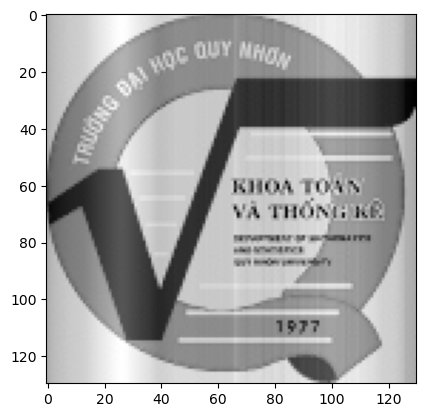

In [23]:
plt.imshow(X_approx.T,cmap='gray')

In [ ]:
path ="faces/"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
fn = path + prefix + str(1).zfill(2) + '.' + "sleepy" + surfix
im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = h * w
N = len(states)*15 

X = np.zeros((D, N))
# collect all data
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        X[:, cnt] = imageio.imread(fn).reshape(D)
        cnt += 1

In [ ]:
path ="faces/"
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight', 
          'noglasses', 'normal', 'rightlight','sad', 
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.pgm'
fn = path + prefix + str(1).zfill(2) + '.' + "sleepy" + surfix
im = imageio.imread(fn)
h = 243 # hight 
w = 320 # width
D = (w//4)*(h//4)
N = len(states)*15

X = np.zeros((D, N))  # Updated to match the new image size
cnt = 0 
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        img = Image.open(fn)
        img_resized = img.resize((w//4, h//4))
        X[:, cnt] = np.array(img_resized).reshape(D)
        cnt += 1

In [ ]:
plt.imshow(X[:,0].reshape(60,80),cmap='gray')

In [ ]:
np.array(img_resized).shape

In [ ]:
img_resized

In [ ]:
img_resized.size

In [ ]:
np.array(img_resized)

In [ ]:
plt.imshow(np.array(img_resized),cmap='gray')

In [ ]:
U, Z = pca(X,100)

In [ ]:
U.shape

In [ ]:
np.mean(X, axis=1).shape

In [ ]:
X_tight = U@Z

In [ ]:
bca

In [ ]:
X_tight

In [ ]:
X_mean=np.mean(X, axis=1).reshape(-1,1)

In [ ]:
bca =np.float64(X_tight+np.mean(X, axis=1).reshape(-1,1))

In [ ]:
plt.imshow(bca[:,0].reshape(243, 320),cmap='gray')

In [ ]:
LA.norm(X_tight-X)

In [ ]:
im.reshape(D, 1)-X_mean

In [ ]:
for person_id in range(7, 13):
    for state in ['centerlight']:
        fn = path+ "/"+ prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = imageio.imread(fn)  #X
        plt.axis('off')
        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.show()
        # reshape and subtract mean, don't forget 
        x = im.reshape(D, 1) - X_mean   # X -X_mean
        # encode
        z = U.T.dot(x) #
        #decode
        x_tilde = U.dot(z) + X_mean

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(243, 320)
        plt.axis('off')
    #         plt.imshow(im_tilde, interpolation='nearest' )
        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        f1.axes.get_yaxis().set_visible(False)
        plt.gray()
        fn = 'res' + str(person_id).zfill(2) + '.png'
    #         plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca_real = PCA(n_components=100) # k = 100 
pca_real.fit(X.T)